# Employee Data Visualization Notebook

## Objective

The goal of this notebook is to explore and visualize the employee dataset, highlighting patterns and distributions in experience, salary, department, education level, and gender.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Define color palette
palette = ["#797d62", "#9b9b7a", "#f1dca7", "#ffcb69", "#d08c60"]

# Load the dataset
df = pd.read_csv('/kaggle/input/employee-salary-dataset/employee_salary_dataset.csv')

# Display first 5 rows
df.head(5)


,EmployeeID,Name,Department,Experience_Years,Education_Level,Age,Gender,City,Monthly_Salary
0,1,Employee_1,Marketing,15,Master,53,Female,Delhi,111416
1,2,Employee_2,Operations,7,Bachelor,25,Female,Bangalore,95271
2,3,Employee_3,IT,12,High School,51,Female,Hyderabad,69064
3,4,Employee_4,Operations,8,PhD,44,Male,Delhi,95091
4,5,Employee_5,Operations,15,Master,36,Female,Delhi,132450


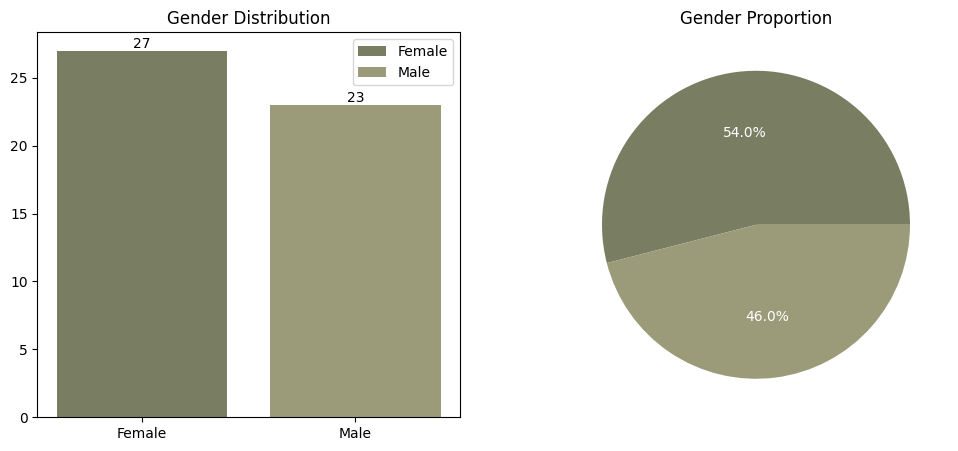

In [2]:
# Prepare data
categories = df['Gender'].value_counts().index.tolist()
values = df['Gender'].value_counts().tolist()

# Create a figure with 1 row and 2 columns
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))


# -------------------
# GRAPH 1 - BAR CHART
# -------------------
bar_chart = ax[0].bar(
    x=categories,
    height=values,
    color=palette[:len(categories)]
)

# Add value labels on top of bars
ax[0].bar_label(bar_chart)

# Add legend
ax[0].legend(handles=bar_chart, labels=categories)

# Add title
ax[0].set_title("Gender Distribution")

# -------------------
# GRAPH 2 - PIE CHART
# -------------------
gender_proportion = (df['Gender'].value_counts(normalize=True) * 100).reset_index()
gender_proportion.columns = ['Gender', 'Percent']

ax[1].pie(
    x=gender_proportion['Percent'],
    labels=gender_proportion['Gender'],
    colors=palette[:len(gender_proportion)],
    autopct='%1.1f%%',
    textprops={'color': 'white'}
)

ax[1].set_title("Gender Proportion")

plt.show()


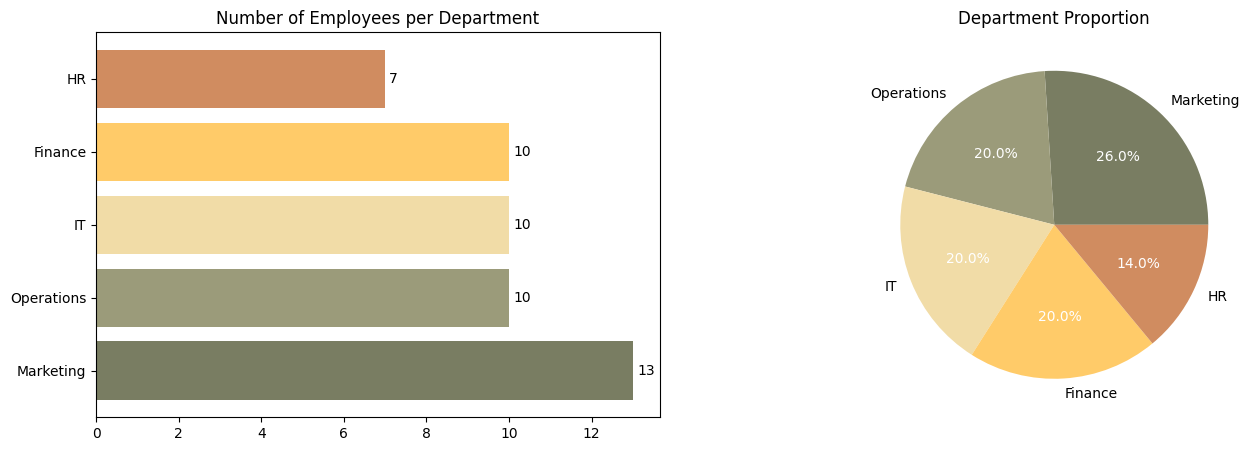

In [3]:
# Prepare department data
df_department = df['Department'].value_counts().reset_index()
df_department['proportion'] = df['Department'].value_counts(normalize=True).mul(100).values
df_department.columns = ['Department', 'Count', 'Proportion']

# Create a figure with 1 row and 2 columns
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

# -------------------
# HORIZONTAL BAR CHART
# -------------------
bars = ax[0].barh(
    y=df_department['Department'],
    width=df_department['Count'],
    color=["#797d62","#9b9b7a","#f1dca7","#ffcb69","#d08c60"]  # match the number of departments
)

# Add value labels
ax[0].bar_label(bars, fmt='%.0f', padding=3)
ax[0].set_title("Number of Employees per Department")

# -------------------
# PIE CHART
# -------------------
wedges, texts, autotexts = ax[1].pie(
    x=df_department['Proportion'],
    labels=df_department['Department'],
    colors=["#797d62","#9b9b7a","#f1dca7","#ffcb69","#d08c60"],
    autopct='%1.1f%%',
    textprops={'color':'white'}
)

# Change label color (department names) to black
for txt in texts:
    txt.set_color('black')

ax[1].set_title("Department Proportion")

plt.show()


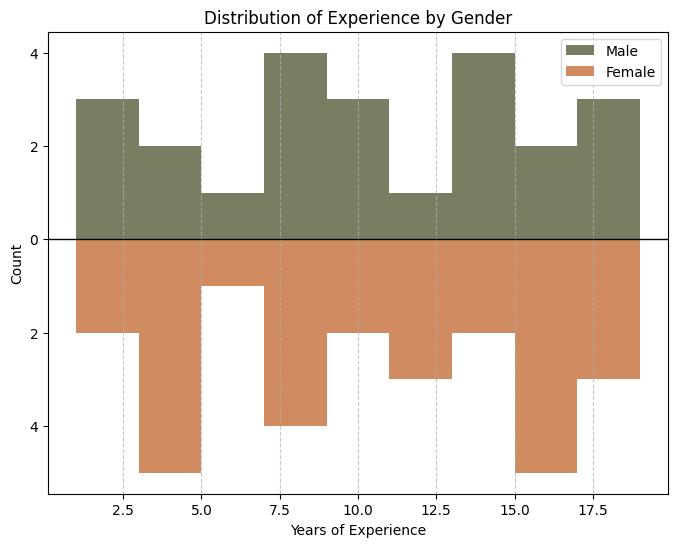

In [4]:
# Color palette
palette = ["#797d62", "#9b9b7a", "#f1dca7", "#ffcb69", "#d08c60"]

# Filter data by gender
male_exp_years = df['Experience_Years'][df['Gender'] == 'Male']
female_exp_years = df['Experience_Years'][df['Gender'] == 'Female']

# Define bins
bin_width = 2
bins = np.arange(
    min(male_exp_years.min(), female_exp_years.min()),
    max(male_exp_years.max(), female_exp_years.max()) + bin_width,
    bin_width
)

# Plot
fig, ax = plt.subplots(figsize=(8,6))

# Male histogram
ax.hist(male_exp_years, bins=bins, label='Male', color=palette[0])

# Female histogram (inverted)
ax.hist(
    female_exp_years, 
    bins=bins, 
    weights=-np.ones_like(female_exp_years), 
    label='Female',
    color=palette[4]
)

# Center line
ax.axhline(0, color='k', linewidth=1)

# Labels and title
ax.set_xlabel('Years of Experience')
ax.set_ylabel('Count')
ax.set_title('Distribution of Experience by Gender')

# Legend
ax.legend()

# Grid for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Y-axis with absolute values
yticks = ax.get_yticks()
ax.set_yticklabels(np.abs(yticks).astype(int))

plt.show()


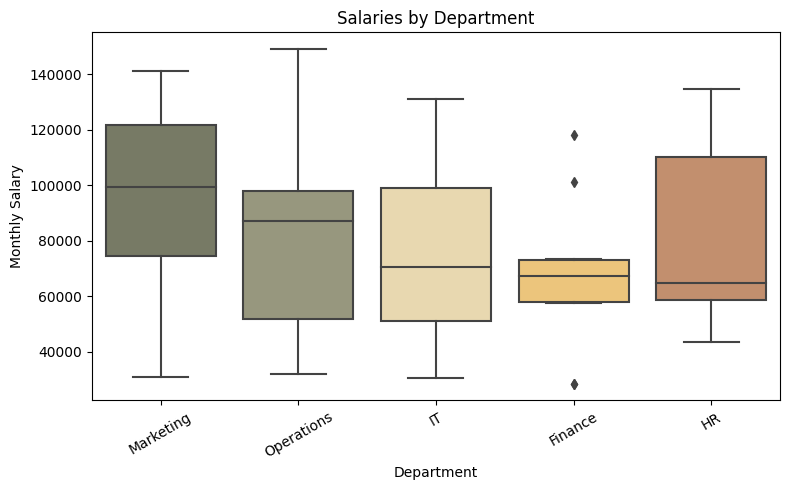

In [5]:
# Boxplot of salaries by department
plt.figure(figsize=(8,5))
sns.boxplot(
    x='Department', 
    y='Monthly_Salary', 
    data=df, 
    palette=palette
)

plt.title("Salaries by Department")
plt.xlabel("Department")
plt.ylabel("Monthly Salary")
plt.xticks(rotation=30)  # rotate names if they are crowded
plt.tight_layout()
plt.show()


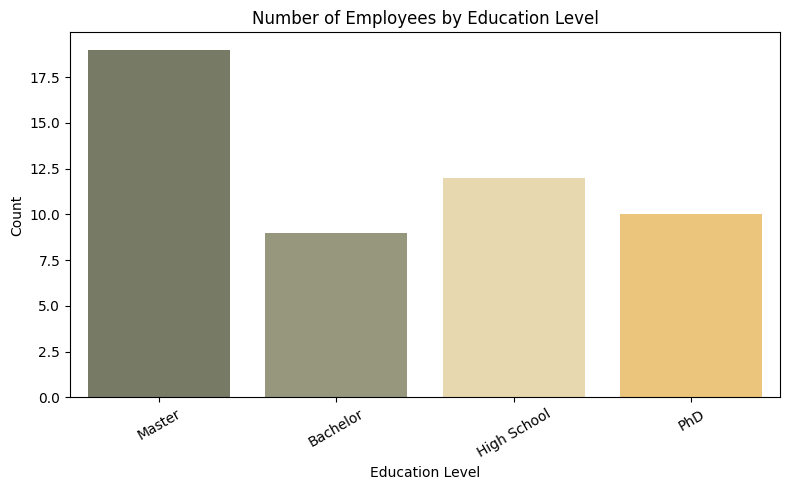

In [6]:
# Countplot by education level
plt.figure(figsize=(8,5))
sns.countplot(
    x='Education_Level', 
    data=df, 
    palette=palette
)

plt.title("Number of Employees by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
